# Euler’s method

> **Questions**
>
> -   How do I use Euler’s method to solve a first-order ODE?
> -   What does the term first-order accurate mean?

> **Objectives**
>
> -   Use Euler’s method, implemented in Python, to solve a first-order
>     ODE
> -   Understand that this method is approximate and the significance of
>     step size $h$
> -   Compare results at different levels of approximation using the
>     `matplotlib` library.

### There are a variety of ways to solve an ODE

In the previous lesson we considered nuclear decay:

This is one of the simplest examples of am ODE - a first-order, linear,
separable differential equation with one dependent variable. We saw that
we could model the number of atoms $N$ by finding an analytic solution
through integration:

However there is more than one way to crack an egg (or solve a
differential equation). We could have, instead, used an approximate,
numerical method. One such method - Euler’s method - is this subject of
this lesson.

### A function can be approximated using a Taylor expansion

The Taylor series is a polynomial expansion of a function about a point.
For example, the image below shows $\mathrm{sin}(x)$ and its Taylor
approximation by polynomials of degree 1, 3, 5, 7, 9, 11, and 13 at
$x = 0$.

<img src="../images/Sintay_SVG.svg" width=500 />

Credit: Image By IkamusumeFan - CC BY-SA 3.0,
https://commons.wikimedia.org/w/index.php?curid=27865201

The Taylor series of $f(x)$ evaluated at point $a$ can be expressed as:

Returning to our example of nuclear decay, we can use a <mark>Taylor
expansion</mark> to write the value of $N$ a short interval $h$ later:

> **Note**
>
> If you want to know more about Taylor expansion, there is an excellent
> video explanation from user `3blue1brown` on Youtube, a link is
> provided under external resources.

### If the step size $h$ is small then higher order terms can be neglected

If $h$ is small and $h^2$ is very small we can neglect the terms in
$h^2$ and higher and we get:

### Euler’s method can be used to approximate the solution of differential equations

We can keep applying the equation above so that we calculate $N(t)$ at a
succession of equally spaced points for as long as we want. If $h$ is
small enough we can get a good approximation to the solution of the
equation. This method for solving differential equations is called
Euler’s method, after Leonhard Euler, its inventor.

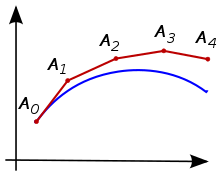

> **Note**
>
> Although we are neglecting terms $h^2$ and higher, Euler’s method
> typically has an error linear in $h$ as the error accumulates over
> repeated steps. This means that if we want to double the accuracy of
> our calculation we need to double the number of steps, and double the
> calcuation time.

> **Note**
>
> So far we have looked at an example where the input (or independent
> variable) is time. This isn’t always the case - but it is the most
> common case in physics, as we are often interested in how things
> evolve with time.

### Euler’s method can be applied using the Python skills we have developed

Let’s use Euler’s method to solve the differential equation for nuclear
decay. We will model the decay process over a period of 10 seconds, with
the decay constant $\lambda=0.1$ and the initial condition $N_0 = 1000$.

First, let’s import the standard scientific libraries we will be using -
Numpy and Matplotlib:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Let’s definte the function $f(N,t)$ which describes the rate of decay.
In this case, the function depends only on the number of atoms present.

In [5]:
# define the function for nuclear decay
def f(Num_atoms):
    return -0.1*Num_atoms

Next we’ll list the simulation parameters and initial conditions: start
time, end time, number of starting atoms (which is an initial
condition), number of time steps and step size (which is calculated
using the number of time steps).

In [6]:
a = 0                  # start time
b = 10                 # end time
Num_atoms = 1000       # initial condition
num_steps = 5         # number of time steps
h = (b-a) / num_steps  # time step size

We use the Numpy `arange` function to generate a list of evenly spaced
times at which to evaluate the number of atoms. We also create an empty
list to hold the values for $N$ that we are yet to calculate.

In [7]:
# use the Numpy arange function to generate a list of evenly spaced times at which to evaluate the number of atoms N.
time_list = np.arange(a,b,h)

# create an empty list to hold the calculated N values
Num_atoms_list = []

Finally, we apply Euler’s method using a `For` loop. Note that the order
of operations in the loop body is important.

In [8]:
# apply Euler's method. Note that the order of operations in the loop body is important.
for time in time_list:
    Num_atoms_list.append(Num_atoms)
    Num_atoms += h*f(Num_atoms)

### We can easily visualise our results, and compare against the analytical solution, using the `matplotlib` plotting library

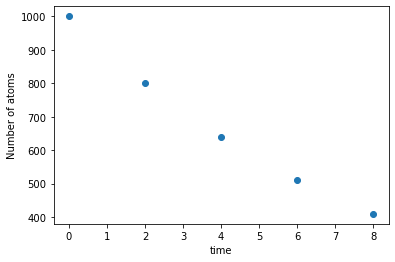

In [9]:
plt.scatter(time_list, Num_atoms_list)
plt.xlabel("time")
plt.ylabel("Number of atoms")
plt.show()

Using the analytic solution from the previous lesson, we can define a
function for calculating the number of atoms $N$ as a function of time
(this is the exact solution).

In [10]:
def analytic_solution(time):
    return 1000*np.exp(-0.1*time)

We can use this to calculate the exact value for $N$ over the full time
range. Note that we use a large number of points in time (in this case
1000) to give a nice smooth curve:

In [45]:
num_steps = 1000
h = (b-a) / num_steps
time_analytic_list = np.arange(a,b,h)
Num_atoms_analytic_list = []

for time in time_analytic_list:
    Num_atoms_analytic_list.append(analytic_solution(time))

Finally, we plot the approximate Euler method results against the exact
analytical solution:

Text(0, 0.5, 'Number of atoms')

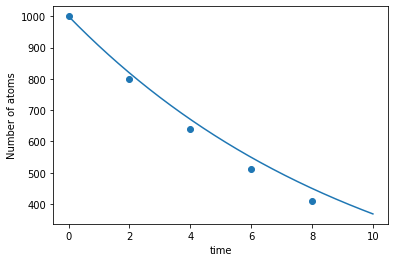

In [46]:
plt.plot(time_analytic_list,Num_atoms_analytic_list)
plt.scatter(time_list, Num_atoms_list)
plt.xlabel("time")
plt.ylabel("Number of atoms")

We can see that the error is increasing over time. We can calculate the
error at $t=8$:

In [16]:
print("Analytic solution at t=8: ",round(analytic_solution(8)))
print("Numerical solution at t=8: ",round(Num_atoms_list[-1]))
print("Error is: ",round(analytic_solution(8)-Num_atoms_list[-1]))

Analytic solution at t=8:  449
Numerical solution at t=8:  410
Error is:  40

### Euler’s method is a first-order method accurate to order $h$.

-   Numerical methods give *approximate* solutions.
-   Euler’s method neglects the term in $h^2$ and higher:
-   This tells us the error introduced on a single step of the method is
    proportional to $h^2$ - this makes Euler’s method a <mark>
    first-order </mark> method, accurate to order $h$.
-   However the cumulative error over several steps is proportional to
    $h$
-   So to make our error half as large we need to double the number of
    steps (halve the step size) and double the length of the
    calculation.

> **Keypoints**
>
> -   There are a variety of ways to solve an ODE
> -   A function can be approximated using a Taylor expansion
> -   If the step size $h$ is small then higher order terms can be
>     neglected
> -   Euler’s method can be used to approximate the solution of
>     differential equations
> -   Euler’s method can be applied using the Python skills we have
>     developed
> -   We can easily visualise our results, and compare against the
>     analytical solution, using the matplotlib plotting library
> -   Euler’s method is a first-order method accurate to order $h$.